### Exercise 1

In [1]:
x <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

E1 <- sum(x*p1)
Var1 <- sum(x**2*p1)-E1**2


E2 <- sum(x*p2)
Var2 <- sum(x**2*p2)-E2**2

cat('First method: \n', 'E[X]=', E1, '\t Var(X)=', Var1, '\n')
cat('Second method: \n', 'E[X]=', E2, '\t Var(X)=', Var2, '\n')


First method: 
 E[X]= 15.959 	 Var(X)= 0.033979 
Second method: 
 E[X]= 15.9622 	 Var(X)= 0.02816716 


### Exercise 2

the probability to wait less than 10 minutes is 0.28 
the mean for the simulated data is 32.15 whereas the theoretical value is 30 
 their compatibility is 0.05 
the probability to wait more than one hour is 0.14

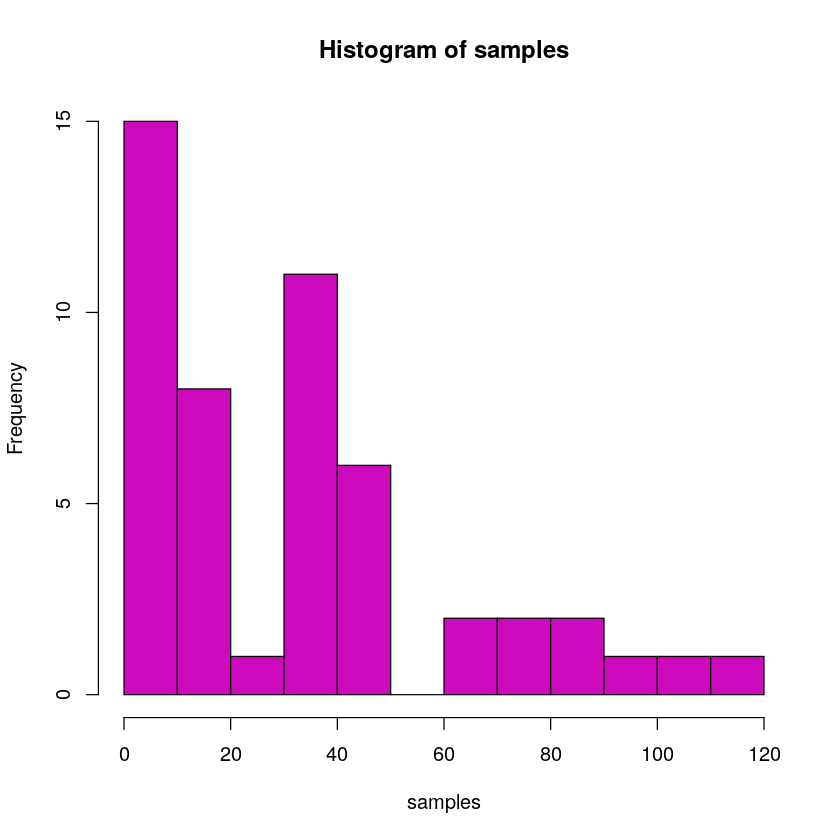

In [2]:
#a
rate = 1/30
samples<-rexp(50,rate=rate)
hist(samples, col=6, breaks=10)
#b
p <- pexp(10, rate=rate)
cat('the probability to wait less than 10 minutes is', round(p,2), '\n')
#c
mean = mean(samples)
std=sd(samples)
average = 1/rate
compatibility = abs(mean-average)/(sqrt(2)*std)
cat('the mean for the simulated data is', round(mean,2), 
    'whereas the theoretical value is', round(average,2), 
    '\n their compatibility is', round(compatibility,2), '\n')
#d
p1h <- pexp(60, rate=rate, lower.tail=FALSE)
cat('the probability to wait more than one hour is', round(p1h,2))

### Exercise 3 

the probability to encounter at least one error on a  page is 0.28

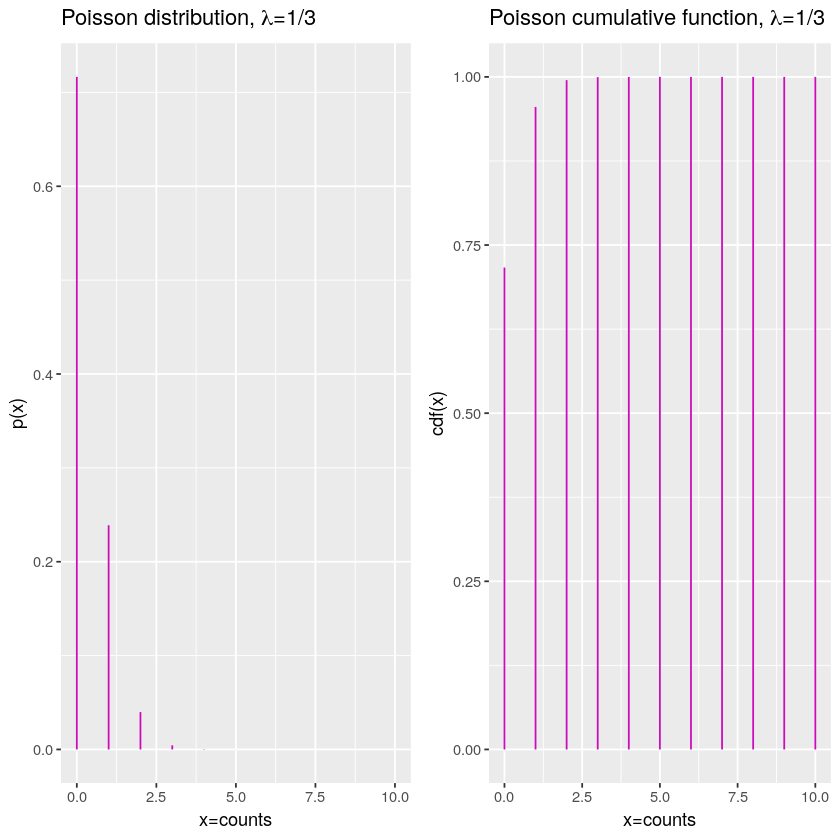

In [3]:
library('ggplot2')
library('latex2exp')
library("gridExtra")

lambda=1/3
x <- 0:10


plot1 <- ggplot(data.frame(x=x), aes(x))+
    geom_segment(aes(x=x, xend=x, y=0,yend=dpois(x, lambda=lambda)), colour=6) + 
    labs(x='x=counts', y='p(x)', title=TeX('Poisson distribution,$\\lambda$=1/3'))

plot2 <- ggplot(data.frame(x=x), aes(x))+
    geom_segment(aes(x=x, xend=x, y=0,yend=ppois(x, lambda=lambda)), colour=6) + 
    labs(x='x=counts', y='cdf(x)', title=TeX('Poisson cumulative function,$\\lambda$=1/3'))

grid.arrange(plot1, plot2, ncol=2)

prob_1 = 1-dpois(0, lambda=lambda)
cat('the probability to encounter at least one error on a  page is', round(prob_1, digits=2))


### Exercise 4

the probability that at least 10 draws will be needed to get an ace is 0.49

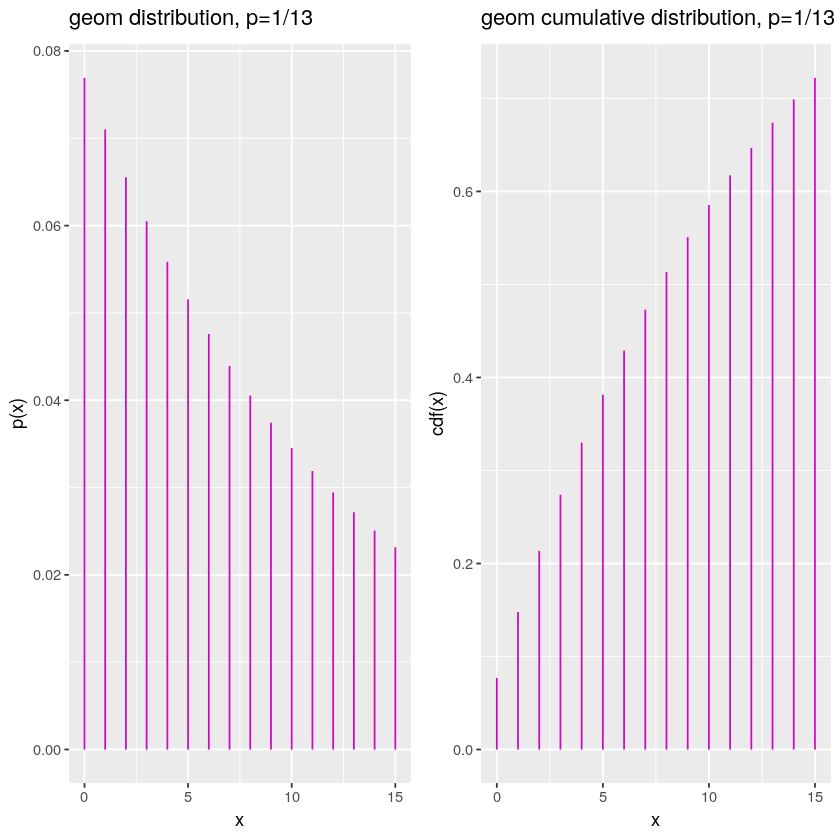

In [14]:
p_ace <- 1/13
x<-0:15
plot1 <- ggplot(data.frame(x=x), aes(x))+
    geom_segment(aes(x=x, xend=x, y=0,yend=dgeom(x, p=p_ace)), colour=6) + 
    labs(x='x', y='p(x)', title=TeX('geom distribution,p=1/13'))

plot2 <- ggplot(data.frame(x=x), aes(x))+
    geom_segment(aes(x=x, xend=x, y=0,yend=pgeom(x, p=p_ace)), colour=6) + 
    labs(x='x', y='cdf(x)', title=TeX('geom cumulative distribution,p=1/13'))

#number of trials to get the first success: geometric distribution
p_atleast10 = 1-pgeom(8, p=p_ace)
cat('the probability that at least 10 draws will be needed to get an ace is', round(p_atleast10,2))
grid.arrange(plot1, plot2, ncol=2)


### Exercise 5

In [10]:
f <- function(c, t) {
    
      q <- ifelse (t>1 & t<2, c*(t-1)*(2-t), 0)
    return (q)
    
}


#a)
x<-seq(0, 3, length.out = 10000)
c=1/integrate(f, lower=1, upper=2, c=1)$value
cat('the normalization costant c is equal to', c)

the normalization costant c is equal to 6

It is possible to verify the result analitically as follows:
$I=\int_{1}^{2}(x-1)(2-x)\,dx=\frac{-1}{3}x^3+\frac{3}{2}x^2-2x \big|_{1}^{2}=\frac{1}{6}\implies \\ c=\frac{1}{\text{I}}=6$

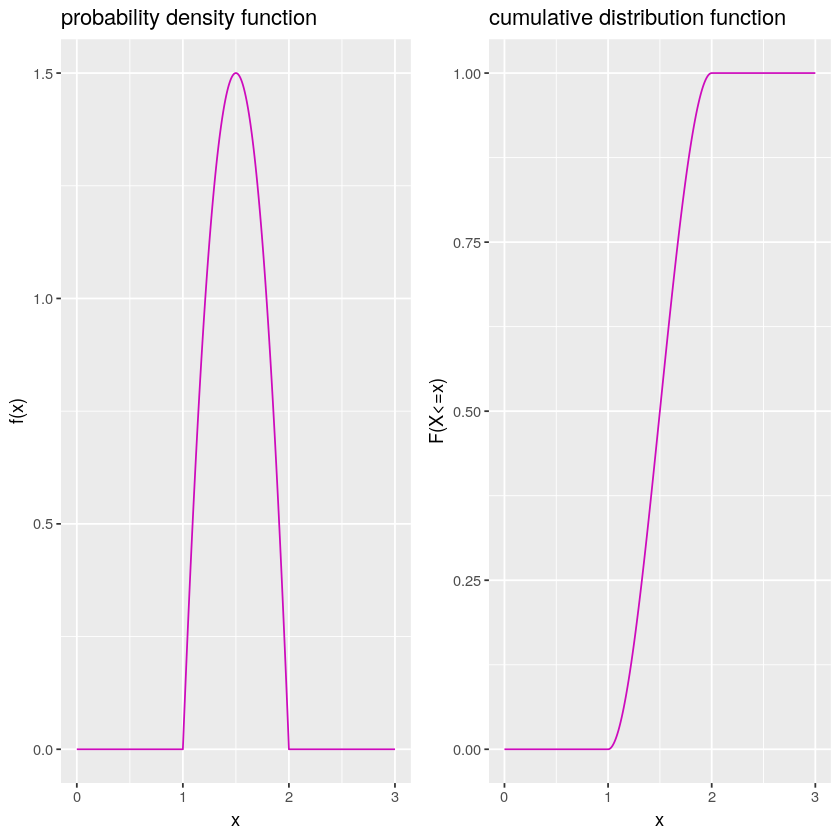

the probability that the student will finish the test in more than 75 minutes is 0.84 
the probability that the test will take between 
90 and 120 minutes is 0.5

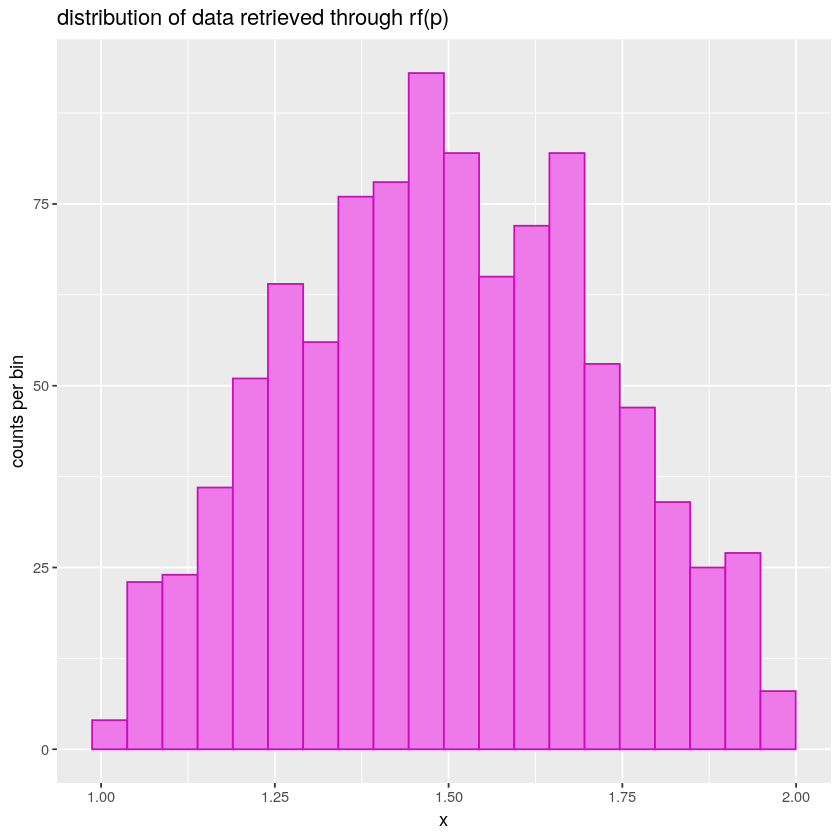

In [7]:
#b)
#probability density function
df <- function(x, c=6) {
    d <- ifelse( x>1 & x<2,
                c*(x-1)*(2-x),
                0
    )
    return(d)
}


#cumulative distribution function
pf <- function(x, c=6){
    ifelse( x>=1 & x<=2,
                p <- c*(-1/6)*((x-1)^2)*(2*x-5),
           ifelse( x<1, 0, 1)
        )
}


#generating data with pf distribution
rf <- function(n) {
    u <- runif(n)
    F.inv <- Vectorize(function(y){uniroot(function(x){pf(x)-y},interval=c(1,2), extendInt='yes', tol=0.0001)$root})
    r <- F.inv(u) 
    return(r)
}


#quantile returning function
qf <- function(p) {
    F.inv <- (function(y){uniroot(function(x){pf(x)-y},interval=c(1,2), extendInt='yes', tol=0.0001)$root})
    return (F.inv(p))
}

#plotting
x <- seq(0,3,length.out=1000)
p <- seq(0,1,length.out=1000)

plot1 <- ggplot() + geom_line(aes(x = x, y = df(x)), color=6) + 
labs(title='probability density function',  x='x', y='f(x)')

plot2 <- ggplot() + geom_line(aes(x = x, y = pf(x)), color=6) + 
labs(title='cumulative distribution function', x='x', y='F(X<=x)')

plot3 <- ggplot() + geom_histogram(aes(x = rf(p)), color=6, fill='orchid2', bins=20) + 
labs(title='distribution of data retrieved through rf(p)', x='x', y='counts per bin')

grid.arrange(plot1, plot2, ncol=2,  widths = c(5, 5))
plot3

#c)
p_from75 = 1-pf(1+1/4)
p_from90to120 = pf(2)-pf(1+0.5)
cat('the probability that the student will finish the test in more than 75 minutes is', round(p_from75, digits=2), '\n')
cat('the probability that the test will take between 
90 and 120 minutes is', p_from90to120)

### Exercise 6
Let's consider the monotinc increasing function $g=10^4x$, where x is a random variable following the distribution function $ f(x)=\begin{cases} 2/x^2 &\quad\text{1<x<2} \\ 0 &\quad \text{otherwise} \end{cases} $ \
The cumulative function of $x$ is F(x)=$\int_1^x \frac{2}{t^2}dt=-\frac{2}{t}\bigg |_1^x=-\frac{2}{x}+2 \qquad \text{ if } 1<x<2$\
The function $g$ defines a new random variable $Y=g(x)$, that will follow the distribution function
    $$f_Y(y)=f_X(h(y))\biggl |\frac{dh(y)}{dy} \biggr | =\begin{cases} \frac{2}{10^{-4}y^2} &\quad\text{10000<y<20000} \\ 0 &\quad \text{otherwise} \end{cases}  \ , $$ in which $h=g^{-1}=10^{-4}y$. \
The cumulative distribution of Y, $F_Y(y)$ is given by
$$ F_Y(y)=P(g(x)\leq))=P(X\leq h(y))=F_x(h(y))=-\frac{2}{10^{-4}y}+2 \qquad \text{ if } 10000<y<20000$$ 

In [11]:
#verify that f is normalized
f <-function(x){return(2/(x^2))}
integrate(f, lower=1, upper=2)$value

[1] 1

the probability that the tire will last less than 15000 km is 0.67 


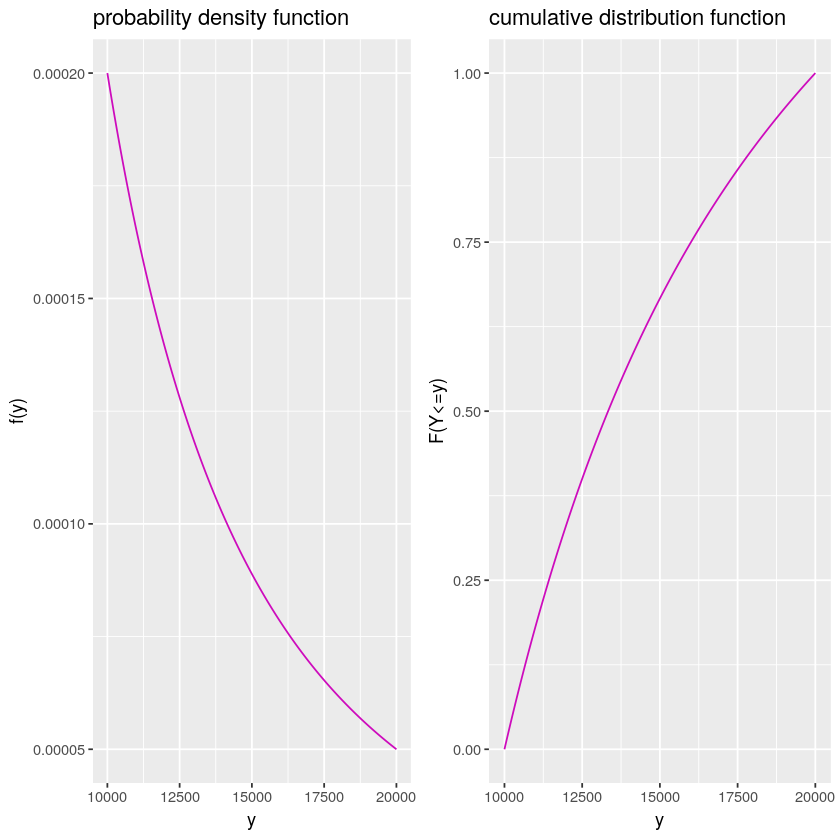

the average of the sample is 13852.1 km with a variance of 7864018 km

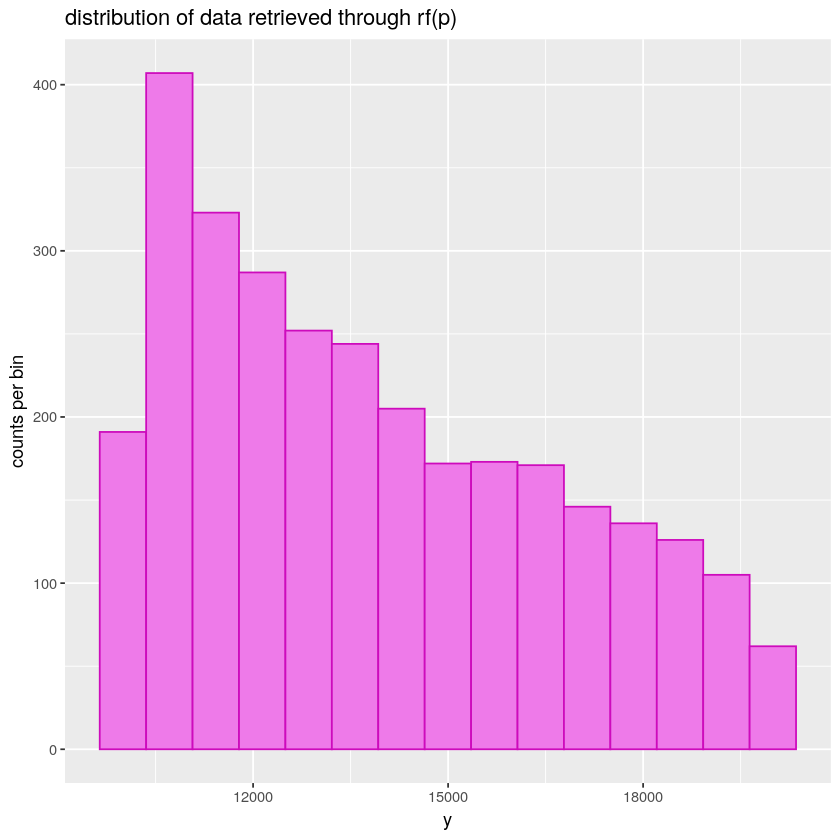

In [13]:
#set of function for the tire lifetime
#a)

df <- function(y) {
    d <- ifelse (y>=10000 & y<=20000, 2/(10^(-4)*y^2), 0)
    return (d)
}

pf <- function(y) {
    p <- ifelse (y>10000 & y<20000, (-2/(10^(-4)*y)+2), ifelse(y<=10000, 0, 1))
    return(p)
}

rf <- function(n) {
    u <- runif(n)
    F.inv <- Vectorize(function(y){uniroot(function(x){pf(x)-y},interval=c(10000,20000), extendInt='yes', tol=0.0001)$root})
    r <- F.inv(u) 
    return(r)
}

qf <- function(p) {
    F.inv <- (function(y){uniroot(function(x){pf(x)-y},interval=c(10000,20000), extendInt='yes', tol=0.0001)$root})
    return (F.inv(p))
}

x <- seq(10000,20000, length.out=1000)
plot1 <- ggplot() + geom_line(aes(x = x, y = df(x)), color=6) + 
labs(title='probability density function',  x='y', y='f(y)')

plot2 <- ggplot() + geom_line(aes(x = x, y = pf(x)), color=6) + 
labs(title='cumulative distribution function', x='y', y='F(Y<=y)')
grid.arrange(plot1, plot2, ncol=2,  widths = c(5, 5))



#b)
p_15000 = pf(15000)
cat('the probability that the tire will last less than 15000 km is', round(p_15000, 2), '\n')


#c)
x <- rf(3000)
plot3 <- ggplot() + geom_histogram(aes(x = x), color=6, fill='orchid2', bins=15) + 
labs(title='distribution of data retrieved through rf(p)', x='y', y='counts per bin')
plot3

mean = mean(x)
var = (mean(x^2)-mean^2)
cat('the average of the sample is', round(mean, 2), 'km with a variance of', var, 'km')